#### 1) load numpy arrays
#### 2) pass it to the model for training
#### 3) plot and evaluate model

In [43]:
import numpy

In [44]:
train_d = numpy.load('train_data.npy')

In [45]:
train_l = numpy.load('train_label.npy')


In [46]:
test_d = numpy.load('test_data.npy')


In [47]:
test_l = numpy.load('test_label.npy')

In [48]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['acc'], marker='.')
    plt.plot(history.history['val_acc'], marker='.')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    plt.savefig('model_accuracy.png')
    plt.close()

    plt.plot(history.history['loss'], marker='.')
    plt.plot(history.history['val_loss'], marker='.')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()
    plt.legend(['loss', 'val_loss'], loc='upper right')
    plt.show()
    plt.savefig('model_loss.png')
    plt.close()

In [49]:
def save_history(history):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open('result.txt', 'w') as fp:
        fp.write('epoch\tloss\tacc\tval_loss\tval_acc\n')
        for i in range(nb_epoch):
            fp.write('{}\t{}\t{}\t{}\t{}\n'.format(
                i, loss[i], acc[i], val_loss[i], val_acc[i]))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, kernel_size=(3, 3, 3), input_shape=(3, 16, 11..., padding="same")`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, kernel_size=(3, 3, 3), padding="same")`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(3, 3, 3), padding="same")`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, kernel_size=(3, 3, 3), padding="same")`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:23: UserWarning: Update your `Conv3D` cal

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_73 (Conv3D)           (None, 3, 16, 112, 128)   387200    
_________________________________________________________________
activation_60 (Activation)   (None, 3, 16, 112, 128)   0         
_________________________________________________________________
conv3d_74 (Conv3D)           (None, 3, 16, 112, 64)    221248    
_________________________________________________________________
activation_61 (Activation)   (None, 3, 16, 112, 64)    0         
_________________________________________________________________
max_pooling3d_41 (MaxPooling (None, 1, 6, 38, 64)      0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 6, 38, 64)      0         
_________________________________________________________________
conv3d_75 (Conv3D)           (None, 1, 6, 38, 64)      110656    
__________

1291/1291 [==============================] - 22s 17ms/step - loss: 1.1511 - acc: 0.6034 - val_loss: 2.0747 - val_acc: 0.3039
Epoch 43/100
1291/1291 [==============================] - 22s 17ms/step - loss: 1.0857 - acc: 0.6228 - val_loss: 2.0418 - val_acc: 0.3333
Epoch 44/100
1291/1291 [==============================] - 22s 17ms/step - loss: 1.0525 - acc: 0.6483 - val_loss: 2.1348 - val_acc: 0.3235
Epoch 45/100
1291/1291 [==============================] - 22s 17ms/step - loss: 1.0653 - acc: 0.6352 - val_loss: 2.1382 - val_acc: 0.3366
Epoch 46/100
1291/1291 [==============================] - 22s 17ms/step - loss: 1.0627 - acc: 0.6491 - val_loss: 2.0512 - val_acc: 0.3431
Epoch 47/100
1291/1291 [==============================] - 22s 17ms/step - loss: 1.0675 - acc: 0.6375 - val_loss: 1.9904 - val_acc: 0.3562
Epoch 48/100
1291/1291 [==============================] - 22s 17ms/step - loss: 0.9975 - acc: 0.6646 - val_loss: 2.0916 - val_acc: 0.3399
Epoch 49/100
1291/1291 [=======================

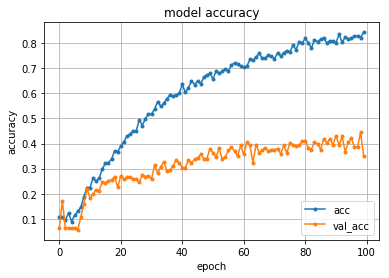

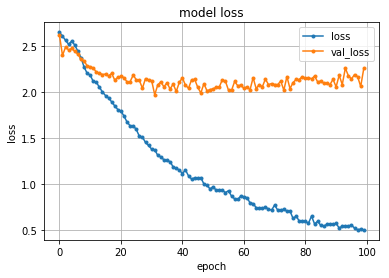

306/306 [==============================] - 2s 7ms/step
Test loss: 2.257973524480084
Test accuracy: 0.34967320261437906


In [52]:
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
# Define model
model = Sequential()
model.add(Conv3D(128, kernel_size=(3, 3, 3), input_shape=(
train_d.shape[1:]), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.5))

model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
model.summary()
#plot_model(model, show_shapes=True,to_file=os.path.join('D:/cognitive/sports/', 'model.png'))
#train_d, train_l, test_d, test_l = train_test_split(X, Y, test_size=0.2, random_state=43)

history = model.fit(train_d, train_l, validation_data=(test_d, test_l), batch_size=130,epochs=100, verbose=1, shuffle=True)
plot_history(history)
save_history(history)
#model.evaluate(test_d, test_l, verbose=1)
model_json = model.to_json()
   
with open( 'ucf101_3dcnnmodel.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights( 'ucf101_3dcnnmodel.hd5')

loss, acc = model.evaluate(test_d, test_l, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)
